#Group Project 2
By: Eve Dean, Jacob Brandis, Eric Vandament

In [3]:
#import packages & mount drive
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/MyDrive/Colab Notebooks/Project 2/'

Mounted at /content/drive


#Election Results 
The goal of this notebook is to create logistic models that predict which of the democratic and republican candidates recieved a higher vote percentage for each county. Another goal of this notebook if to predict the number of votes cast. All predictions are based on demographic characteristics of counties and states, specifially looking at the racial/ethinic breakdown and gender breakdown of the population.\
This is an imcomplete dataset, we are missing all values for Minnesota and some values for South Dakota.

##Data Loading & Cleaning

Load & Clean Primary Results

In [4]:
#load results
results_df = pd.read_csv(drive_dir + 'primary_results.csv')
results_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [5]:
results_df['candidate'].value_counts()

Bernie Sanders     4205
Hillary Clinton    4205
Donald Trump       3586
John Kasich        3586
Ted Cruz           3586
Marco Rubio        2555
Ben Carson         1669
 No Preference      351
Jeb Bush            155
Carly Fiorina       109
Chris Christie      109
 Uncommitted         99
Martin O'Malley      99
Mike Huckabee        99
Rand Paul            99
Rick Santorum        99
Name: candidate, dtype: int64

In [6]:
results_df['party'].value_counts()

Republican    15652
Democrat       8959
Name: party, dtype: int64

Load & Clean County Facts

In [10]:
#load data
county_df = pd.read_csv(drive_dir + 'county_facts.csv')
county_df.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [11]:
#rename columns to sensible names
county_df = county_df.rename(columns={'PST045214':'Population_est (2014)',
                                      'PST040210':'Population_est (2010)',
                                      'PST120214':'Population_PCT_Change (2010-2014)',
                                      'POP010210':'Population (2010)',
                                      'AGE135124':'Under_5_age_pct (2014)',
                                      'AGE295214':'Under_18_age_pct (2014)',
                                      'AGE775214':'Over_65_age_pct (2014)',
                                      'SEX255214':'Female_pct (2014)',
                                      'RHI125214':'White_pct (2014)',
                                      'RHI225214':'Black_pct (2014)',
                                      'RHI325214':'IndianAmer_pct (2014)',
                                      'RHI425214':'Asian_pct (2014)',
                                      'RHI525214':'Hawaiian_pct (2014)',
                                      'RHI625214':'Biracial_pct (2014)',
                                      'RHI725214':'Hispanic_pct (2014)',
                                      'RHI825214':'Caucasian_pct (2014)',
                                      'POP715213':'Home_duration_over_1_year_ptc (2009-2013)',
                                      'POP645213':'Expatriate_pct (2009-2014)',
                                      'POP815213':'Bilingual_home_age_5_over_ptc (2009-2013)',
                                      'EDU635213':'GED_degree_age_25_over_pct (2009-2013)',
                                      'EUD685213':'Bachelor_degree_age_25_over_pct (2009-2013)',
                                      'VET605213':'Veterans (2009-2013)',
                                      'LFE305213':'Work_commute_min_age_16_over (2009-2013)',
                                      'HSG010214':'Num_houses (2014)',
                                      'HSG445213':'Homeownership_pct (2009-2013)',
                                      'HSG096213':'Muti_unit_houses_pct (2009-2013)',
                                      'HSG495213':'Median_home_value_owner_occupied (2009-2013)',
                                      'HSD410213':'Num_households (2009-2013)',
                                      'HSD310213':'Num_people_per_household (2009-2013)',
                                      'INC910213':'Per_capita_income_12_months (2013)',
                                      'INC110213':'Median_household_income (2009-2013)',
                                      'PVY020213':'Pct_below_pverty_level (2009-2013)',
                                      'BZA010213':'Private_establishment (2013)',
                                      'BZA110213':'Num_private_establishment_employees (2013)',
                                      'BZA115213':'Pct_change_private_establishment_employees (2009-2013)',
                                      'NES010213':'Nonemployer_establishments (2013)',
                                      'SBO001207':'Num_firms (2007)',
                                      'SBO315207':'Black_owned_firms_pct (2007)',
                                      'SBO115207':'IndianAmer_owned_firms_pct (2007)',
                                      'SBO215207':'Asian_owned_firms_pct (2007)',
                                      'SBO515207':'Hawaiian_owned_firms_pct (2007)',
                                      'SBO415207':'Hispanic_owned_firms_pct (2007)',
                                      'SBO015207':'Women_owned_firms_pct (2007)',
                                      'MAN450207':'Manufacturers_shipments_by_$1000 (2007)',
                                      'WTN220207':'Merchant_wholesaler_sales_by_$1000 (2007)',
                                      'RTN130207':'Retail_sales_by_$1000 (2007)',
                                      'RTN131207':'Retail_sales_per_capita (2007)',
                                      'AFN120207':'Accom_and_food_service_sales_by_$1000 (2007)',
                                      'BPS030214':'Building_permits (2014)',
                                      'LND110201':'Land_area_in_sqr_miles (2010)',
                                      'POP060210':'Population_per_sqr_mile (2010)'})

county_df.columns

Index(['fips', 'area_name', 'state_abbreviation', 'Population_est (2014)',
       'Population_est (2010)', 'Population_PCT_Change (2010-2014)',
       'Population (2010)', 'AGE135214', 'Under_18_age_pct (2014)',
       'Over_65_age_pct (2014)', 'Female_pct (2014)', 'White_pct (2014)',
       'Black_pct (2014)', 'IndianAmer_pct (2014)', 'Asian_pct (2014)',
       'Hawaiian_pct (2014)', 'Biracial_pct (2014)', 'Hispanic_pct (2014)',
       'Caucasian_pct (2014)', 'Home_duration_over_1_year_ptc (2009-2013)',
       'Expatriate_pct (2009-2014)',
       'Bilingual_home_age_5_over_ptc (2009-2013)',
       'GED_degree_age_25_over_pct (2009-2013)', 'EDU685213',
       'Veterans (2009-2013)', 'Work_commute_min_age_16_over (2009-2013)',
       'Num_houses (2014)', 'Homeownership_pct (2009-2013)',
       'Muti_unit_houses_pct (2009-2013)',
       'Median_home_value_owner_occupied (2009-2013)',
       'Num_households (2009-2013)', 'Num_people_per_household (2009-2013)',
       'Per_capita_income_12

In [12]:
#make a new df with variables I'm interested in
county_stats = county_df[['fips',
                                'area_name', 
                                'state_abbreviation',
                                'Population_est (2014)',
                                'Population_est (2010)',
                                'Population_PCT_Change (2010-2014)',
                                'Population (2010)',
                                'Under_18_age_pct (2014)',
                                'Over_65_age_pct (2014)',
                                'Female_pct (2014)',
                                'White_pct (2014)',
                                'Black_pct (2014)',
                                'IndianAmer_pct (2014)',
                                'Asian_pct (2014)',
                                'Hawaiian_pct (2014)',
                                'Biracial_pct (2014)',
                                'Hispanic_pct (2014)',
                                'Caucasian_pct (2014)',
                                'Population_per_sqr_mile (2010)',
                                'Median_household_income (2009-2013)',
                                'Pct_below_pverty_level (2009-2013)',
                                'Retail_sales_by_$1000 (2007)',
                                'Retail_sales_per_capita (2007)']]

In [14]:
#looking at just the demographics
county_stats[['White_pct (2014)',
                                'Black_pct (2014)',
                                'IndianAmer_pct (2014)',
                                'Asian_pct (2014)',
                                'Hawaiian_pct (2014)',
                                'Biracial_pct (2014)',
                                'Hispanic_pct (2014)',
                                'Caucasian_pct (2014)']].head()

,White_pct (2014),Black_pct (2014),IndianAmer_pct (2014),Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014)
0,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1
1,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2
2,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6
3,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0
4,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6


#Subsetting Data & Merging DFs

##Results & stats grouped by state


In [15]:
#make df with the number of votes cast per state
#sum the county
states_df = results_df.groupby('state_abbreviation').agg({'votes': sum})
states_df = states_df.reset_index(drop=False)

states_df["votes"].sum()
states_df.head()

,state_abbreviation,votes
0,AK,22469
1,AL,1223959
2,AR,605971
3,AZ,834200
4,CA,4938197


county facts grouped by state: summed population values, averaged any percent or normalized values

In [16]:
#group county stats by state - any numbers were summed, percents were averaged
state_facts = county_stats.groupby('state_abbreviation').agg({'Population_est (2014)':sum,
                                'Population_est (2010)':sum,
                                'Population_PCT_Change (2010-2014)':np.mean,
                                'Population (2010)':sum,
                                'Under_18_age_pct (2014)':np.mean,
                                'Over_65_age_pct (2014)':np.mean,
                                'Female_pct (2014)':np.mean,
                                'White_pct (2014)':np.mean,
                                'Black_pct (2014)':np.mean,
                                'IndianAmer_pct (2014)':np.mean,
                                'Asian_pct (2014)':np.mean,
                                'Hawaiian_pct (2014)':np.mean,
                                'Biracial_pct (2014)':np.mean,
                                'Hispanic_pct (2014)':np.mean,
                                'Caucasian_pct (2014)':np.mean,
                                'Population_per_sqr_mile (2010)':np.mean,
                                'Median_household_income (2009-2013)':np.mean,
                                'Pct_below_pverty_level (2009-2013)':np.mean,
                                'Retail_sales_by_$1000 (2007)':np.mean,
                                'Retail_sales_per_capita (2007)':np.mean})
state_facts = state_facts.reset_index(drop=False)

state_facts.head()

,state_abbreviation,Population_est (2014),Population_est (2010),Population_PCT_Change (2010-2014),Population (2010),Under_18_age_pct (2014),Over_65_age_pct (2014),Female_pct (2014),White_pct (2014),Black_pct (2014),...,Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007)
0,AK,736732,710249,2.196552,710231,24.279310,10.282759,45.731034,52.510345,1.920690,...,5.682759,0.551724,7.451724,4.889655,49.193103,7.741379,62611.344828,13.431034,3.205411e+05,9056.655172
1,AL,4849377,4780127,-0.547761,4779736,22.379104,16.935821,51.262687,68.264179,28.655224,...,0.732836,0.110448,1.434328,3.540299,65.394030,90.207463,37778.716418,21.511940,8.558933e+05,9104.716418
2,AR,2966369,2915958,-1.389333,2915918,22.702667,18.336000,50.541333,80.406667,16.133333,...,0.781333,0.097333,1.694667,5.113333,75.933333,54.352000,35861.813333,21.664000,4.396571e+05,8957.880000
3,AZ,6731484,6392310,2.346667,6392017,23.846667,18.973333,49.633333,78.986667,2.333333,...,1.453333,0.200000,2.266667,30.620000,51.300000,52.046667,42891.266667,21.273333,5.783920e+06,11482.000000
4,CA,38802500,37254503,1.350000,37253956,22.517241,15.965517,49.517241,81.594828,3.565517,...,7.496552,0.393103,3.798276,29.846552,55.217241,663.251724,55558.017241,16.431034,7.845203e+06,11258.482759


##Merge & group by
Create a republican and democratic dataframe combined with relevant county stats, these dfs will be used to make models

###All of the columns

In [17]:
fullest_df = pd.merge(results_df, county_df, on = ['state_abbreviation','fips'])
fullest_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hispanic_owned_firms_pct (2007),Women_owned_firms_pct (2007),Manufacturers_shipments_by_$1000 (2007),Merchant_wholesaler_sales_by_$1000 (2007),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),Accom_and_food_service_sales_by_$1000 (2007),Building_permits (2014),LND110210,Population_per_sqr_mile (2010)
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
2,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146,Autauga County,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
4,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035,Autauga County,55395,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8


In [18]:
fullest_df['votes_100K'] = (fullest_df['votes']/fullest_df['Population_est (2014)'])*100000

In [19]:
fullest_df.shape

(17479, 61)

In [20]:
fullest_df.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes', 'area_name', 'Population_est (2014)',
       'Population_est (2010)', 'Population_PCT_Change (2010-2014)',
       'Population (2010)', 'AGE135214', 'Under_18_age_pct (2014)',
       'Over_65_age_pct (2014)', 'Female_pct (2014)', 'White_pct (2014)',
       'Black_pct (2014)', 'IndianAmer_pct (2014)', 'Asian_pct (2014)',
       'Hawaiian_pct (2014)', 'Biracial_pct (2014)', 'Hispanic_pct (2014)',
       'Caucasian_pct (2014)', 'Home_duration_over_1_year_ptc (2009-2013)',
       'Expatriate_pct (2009-2014)',
       'Bilingual_home_age_5_over_ptc (2009-2013)',
       'GED_degree_age_25_over_pct (2009-2013)', 'EDU685213',
       'Veterans (2009-2013)', 'Work_commute_min_age_16_over (2009-2013)',
       'Num_houses (2014)', 'Homeownership_pct (2009-2013)',
       'Muti_unit_houses_pct (2009-2013)',
       'Median_home_value_owner_occupied (2009-2013)',
       'Num_households (2009-2

###Columns I want

In [21]:
full_df = pd.merge(results_df, county_stats, on = ['state_abbreviation','fips'])
full_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007)
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,1.1,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,1.1,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003
2,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146,Autauga County,55395,...,1.1,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003
3,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,1.1,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003
4,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035,Autauga County,55395,...,1.1,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003


In [22]:
#add column for the number of votes cast per county per 100K people
full_df['votes_100K'] = (full_df['votes']/full_df['Population_est (2014)'])*100000
full_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,982.038090
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,4309.053164
2,Alabama,AL,Autauga,1001.0,Republican,Ben Carson,1764,0.146,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,3184.402924
3,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,9724.704396
4,Alabama,AL,Autauga,1001.0,Republican,John Kasich,421,0.035,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,759.996390


In [23]:
full_df.shape

(17479, 30)

###Data aggregated by states

In [24]:
state_results = full_df.groupby('state_abbreviation').agg({'votes': sum,
                                'Population_est (2014)':sum,
                                'Population_est (2010)':sum,
                                'Population_PCT_Change (2010-2014)':np.mean,
                                'Population (2010)':sum,
                                'Under_18_age_pct (2014)':np.mean,
                                'Over_65_age_pct (2014)':np.mean,
                                'Female_pct (2014)':np.mean,
                                'White_pct (2014)':np.mean,
                                'Black_pct (2014)':np.mean,
                                'IndianAmer_pct (2014)':np.mean,
                                'Asian_pct (2014)':np.mean,
                                'Hawaiian_pct (2014)':np.mean,
                                'Biracial_pct (2014)':np.mean,
                                'Hispanic_pct (2014)':np.mean,
                                'Caucasian_pct (2014)':np.mean,
                                'Population_per_sqr_mile (2010)':np.mean,
                                'Median_household_income (2009-2013)':np.mean,
                                'Pct_below_pverty_level (2009-2013)':np.mean,
                                'Retail_sales_by_$1000 (2007)':np.mean,
                                'Retail_sales_per_capita (2007)':np.mean})

state_results = state_results.reset_index(drop=False)
state_results.head()

,state_abbreviation,votes,Population_est (2014),Population_est (2010),Population_PCT_Change (2010-2014),Population (2010),Under_18_age_pct (2014),Over_65_age_pct (2014),Female_pct (2014),White_pct (2014),...,Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007)
0,AL,1223959,33945639,33460889,-0.547761,33458152,22.379104,16.935821,51.262687,68.264179,...,0.732836,0.110448,1.434328,3.540299,65.394030,90.207463,37778.716418,21.511940,8.558933e+05,9104.716418
1,AR,605971,20764583,20411706,-1.389333,20411426,22.702667,18.336000,50.541333,80.406667,...,0.781333,0.097333,1.694667,5.113333,75.933333,54.352000,35861.813333,21.664000,4.396571e+05,8957.880000
2,AZ,834200,33657420,31961550,2.346667,31960085,23.846667,18.973333,49.633333,78.986667,...,1.453333,0.200000,2.266667,30.620000,51.300000,52.046667,42891.266667,21.273333,5.783920e+06,11482.000000
3,CA,4938197,194012500,186272515,1.350000,186269780,22.517241,15.965517,49.517241,81.594828,...,7.496552,0.393103,3.798276,29.846552,55.217241,663.251724,55558.017241,16.431034,7.845203e+06,11258.482759
4,CO,121184,10711732,10058648,1.201562,10058392,20.871875,17.226562,48.045313,92.618750,...,1.303125,0.125000,2.070312,19.612500,75.114063,145.900000,50853.390625,14.204688,1.029637e+06,11470.250000


In [26]:
#add column woth num votes per 100K for each state
state_results['votes_100K'] = (state_results['votes']/state_results['Population_est (2014)'])*100000
state_results.head()

,state_abbreviation,votes,Population_est (2014),Population_est (2010),Population_PCT_Change (2010-2014),Population (2010),Under_18_age_pct (2014),Over_65_age_pct (2014),Female_pct (2014),White_pct (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
0,AL,1223959,33945639,33460889,-0.547761,33458152,22.379104,16.935821,51.262687,68.264179,...,0.110448,1.434328,3.540299,65.394030,90.207463,37778.716418,21.511940,8.558933e+05,9104.716418,3605.644307
1,AR,605971,20764583,20411706,-1.389333,20411426,22.702667,18.336000,50.541333,80.406667,...,0.097333,1.694667,5.113333,75.933333,54.352000,35861.813333,21.664000,4.396571e+05,8957.880000,2918.291208
2,AZ,834200,33657420,31961550,2.346667,31960085,23.846667,18.973333,49.633333,78.986667,...,0.200000,2.266667,30.620000,51.300000,52.046667,42891.266667,21.273333,5.783920e+06,11482.000000,2478.502511
3,CA,4938197,194012500,186272515,1.350000,186269780,22.517241,15.965517,49.517241,81.594828,...,0.393103,3.798276,29.846552,55.217241,663.251724,55558.017241,16.431034,7.845203e+06,11258.482759,2545.298370
4,CO,121184,10711732,10058648,1.201562,10058392,20.871875,17.226562,48.045313,92.618750,...,0.125000,2.070312,19.612500,75.114063,145.900000,50853.390625,14.204688,1.029637e+06,11470.250000,1131.320313


###Data again

In [27]:
county_df = full_df.groupby(['state_abbreviation','county','fips']).agg({'Population_est (2014)':np.mean,
                                'Population_est (2010)':np.mean,
                                'Population_PCT_Change (2010-2014)':np.mean,
                                'Population (2010)':np.mean,
                                'Under_18_age_pct (2014)':np.mean,
                                'Over_65_age_pct (2014)':np.mean,
                                'Female_pct (2014)':np.mean,
                                'White_pct (2014)':np.mean,
                                'Black_pct (2014)':np.mean,
                                'IndianAmer_pct (2014)':np.mean,
                                'Asian_pct (2014)':np.mean,
                                'Hawaiian_pct (2014)':np.mean,
                                'Biracial_pct (2014)':np.mean,
                                'Hispanic_pct (2014)':np.mean,
                                'Caucasian_pct (2014)':np.mean,
                                'Population_per_sqr_mile (2010)':np.mean,
                                'Median_household_income (2009-2013)':np.mean,
                                'Pct_below_pverty_level (2009-2013)':np.mean,
                                'Retail_sales_by_$1000 (2007)':np.mean,
                                'Retail_sales_per_capita (2007)':np.mean})

county_df = county_df.reset_index(drop=False)
county_df.head()

,state_abbreviation,county,fips,Population_est (2014),Population_est (2010),Population_PCT_Change (2010-2014),Population (2010),Under_18_age_pct (2014),Over_65_age_pct (2014),Female_pct (2014),...,Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007)
0,AL,Autauga,1001.0,55395.0,54571.0,1.5,54571.0,25.2,13.8,51.4,...,1.1,0.1,1.8,2.7,75.6,91.8,53682.0,12.1,598175.0,12003.0
1,AL,Baldwin,1003.0,200111.0,182265.0,9.8,182265.0,22.2,18.7,51.2,...,0.9,0.1,1.6,4.6,83.0,114.6,50221.0,13.9,2966489.0,17166.0
2,AL,Barbour,1005.0,26887.0,27457.0,-2.1,27457.0,21.2,16.5,46.6,...,0.5,0.2,0.9,4.5,46.6,31.0,32911.0,26.7,188337.0,6334.0
3,AL,Bibb,1007.0,22506.0,22919.0,-1.8,22915.0,21.0,14.8,45.9,...,0.2,0.1,0.9,2.1,74.5,36.8,36447.0,18.1,124707.0,5804.0
4,AL,Blount,1009.0,57719.0,57322.0,0.7,57322.0,23.6,17.0,50.5,...,0.3,0.1,1.2,8.7,87.8,88.9,44145.0,15.8,319700.0,5622.0


##Clinton vs Sanders
Make a new df to compare votes for Hillary Clinton and Bernie Sanders. We chose to focus on Clinton and Sanders because they were among the more popular democratic candidates.



In [29]:
#pull all rows with candidates Hillary Clinton or Bernie Sanders
dem_df = full_df[(full_df['candidate'] == 'Bernie Sanders') | (full_df['candidate'] == 'Hillary Clinton')]
dem_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,982.038090
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,4309.053164
7,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,Baldwin County,200111,...,0.1,1.6,4.6,83.0,114.6,50221,13.9,2966489,17166,1346.252830
8,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Baldwin County,200111,...,0.1,1.6,4.6,83.0,114.6,50221,13.9,2966489,17166,2643.532839
14,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,Barbour County,26887,...,0.2,0.9,4.5,46.6,31.0,32911,26.7,188337,6334,825.677837


In [30]:
for col in dem_df.columns:
  missing = dem_df[col].isna().sum()
  num_col = dem_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')

state:0.00%
state_abbreviation:0.00%
county:0.00%
fips:0.00%
party:0.00%
candidate:0.00%
votes:0.00%
fraction_votes:0.00%
area_name:0.00%
Population_est (2014):0.00%
Population_est (2010):0.00%
Population_PCT_Change (2010-2014):0.00%
Population (2010):0.00%
Under_18_age_pct (2014):0.00%
Over_65_age_pct (2014):0.00%
Female_pct (2014):0.00%
White_pct (2014):0.00%
Black_pct (2014):0.00%
IndianAmer_pct (2014):0.00%
Asian_pct (2014):0.00%
Hawaiian_pct (2014):0.00%
Biracial_pct (2014):0.00%
Hispanic_pct (2014):0.00%
Caucasian_pct (2014):0.00%
Population_per_sqr_mile (2010):0.00%
Median_household_income (2009-2013):0.00%
Pct_below_pverty_level (2009-2013):0.00%
Retail_sales_by_$1000 (2007):0.00%
Retail_sales_per_capita (2007):0.00%
votes_100K:0.00%


Need to select candidate with highest percent vote per county & add to df

In [33]:
#find winner of primary per county, make new df displying fips, county names, and if Clinton wins (T/F)

clinton_sanders_county = dem_df.groupby('county')
clinton_win=[]
county_fips = []
county_names = []
for county, county_df in clinton_sanders_county:
  row_with_max_votes = county_df[county_df['fraction_votes'] == county_df['fraction_votes'].max()]
  winner = row_with_max_votes['candidate']
  x = winner.to_string(index=False)
  if x == 'Hillary Clinton':
      clinton_win.append(1)
  else:
      clinton_win.append(0)
  county_fips.append(row_with_max_votes['fips'].to_string(index=False))
  county_names.append(row_with_max_votes['county'].to_string(index=False))

# clint_df = pd.DataFrame (clinton_win, columns = ['clinton_win'])

clint_df = pd.DataFrame ({'county':county_names,'fips':county_fips,'clinton_win':clinton_win})


clint_df['clinton_win'].unique()
clint_df.head()

,county,fips,clinton_win
0,Abbeville,45001.0,1
1,Acadia,22001.0,1
2,Accomack,51001.0,1
3,Ada,16001.0,0
4,Adair,29001.0,0


In [ ]:
#sanity check
dem_df[(dem_df['fips'] == 29001.0)]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
8070,Missouri,MO,Adair,29001.0,Democrat,Bernie Sanders,1153,0.588,Adair County,25602,...,0.1,1.8,2.6,91.4,45.1,34733,23.7,310089,12590,4503.554410
8071,Missouri,MO,Adair,29001.0,Democrat,Hillary Clinton,799,0.407,Adair County,25602,...,0.1,1.8,2.6,91.4,45.1,34733,23.7,310089,12590,3120.849934


In [34]:
#make new df with democratic counties and clinton win boolean values
dem_df['fips']=dem_df['fips'].astype(str)
clint_df['fips']=clint_df['fips'].astype(str)
dem_winner = dem_df.merge(clint_df, on = 'fips')
dem_winner.head()

<ipython-input-34-a92d8b8b85d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem_df['fips']=dem_df['fips'].astype(str)


,state,state_abbreviation,county_x,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K,county_y,clinton_win
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,2.7,75.6,91.8,53682,12.1,598175,12003,982.038090,Autauga,1
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,2.7,75.6,91.8,53682,12.1,598175,12003,4309.053164,Autauga,1
2,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,Barbour County,26887,...,4.5,46.6,31.0,32911,26.7,188337,6334,825.677837,Barbour,1
3,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Barbour County,26887,...,4.5,46.6,31.0,32911,26.7,188337,6334,9547.364898,Barbour,1
4,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386,Blount County,57719,...,8.7,87.8,88.9,44145,15.8,319700,5622,684.350041,Blount,1


##Trump vs Cruz
Make a new df to compare votes for Donald Trump and Ted Cruz. We chose to focus on Trump and Cruz because they were among the more popular republican candidates.


In [31]:
#pull all rows with candidates Donald Trump or Ted Cruz
rep_df = full_df[(full_df['candidate'] == 'Donald Trump') | (full_df['candidate'] == 'Ted Cruz')]
rep_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
3,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,9724.704396
6,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,Autauga County,55395,...,0.1,1.8,2.7,75.6,91.8,53682,12.1,598175,12003,4480.548786
10,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,Baldwin County,200111,...,0.1,1.6,4.6,83.0,114.6,50221,13.9,2966489,17166,11802.449640
13,Alabama,AL,Baldwin,1003.0,Republican,Ted Cruz,8571,0.170,Baldwin County,200111,...,0.1,1.6,4.6,83.0,114.6,50221,13.9,2966489,17166,4283.122867
17,Alabama,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501,Barbour County,26887,...,0.2,0.9,4.5,46.6,31.0,32911,26.7,188337,6334,6359.950906


In [35]:
for col in rep_df.columns:
  missing = rep_df[col].isna().sum()
  num_col = rep_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')

state:0.00%
state_abbreviation:0.00%
county:0.00%
fips:0.00%
party:0.00%
candidate:0.00%
votes:0.00%
fraction_votes:0.00%
area_name:0.00%
Population_est (2014):0.00%
Population_est (2010):0.00%
Population_PCT_Change (2010-2014):0.00%
Population (2010):0.00%
Under_18_age_pct (2014):0.00%
Over_65_age_pct (2014):0.00%
Female_pct (2014):0.00%
White_pct (2014):0.00%
Black_pct (2014):0.00%
IndianAmer_pct (2014):0.00%
Asian_pct (2014):0.00%
Hawaiian_pct (2014):0.00%
Biracial_pct (2014):0.00%
Hispanic_pct (2014):0.00%
Caucasian_pct (2014):0.00%
Population_per_sqr_mile (2010):0.00%
Median_household_income (2009-2013):0.00%
Pct_below_pverty_level (2009-2013):0.00%
Retail_sales_by_$1000 (2007):0.00%
Retail_sales_per_capita (2007):0.00%
votes_100K:0.00%


Need to select candidate with highest percent vote per county

In [36]:
#find winner of primary per county, add column displying win (T/F)

trump_cruz_county = rep_df.groupby('county')
trump_win = []
county_fips = []
county_names = []
for county, county_df in trump_cruz_county:
  row_with_max_votes = county_df[county_df['fraction_votes'] == county_df['fraction_votes'].max()]
  winner = row_with_max_votes['candidate']
  x = winner.to_string(index=False)
  if x == 'Donald Trump':
      trump_win.append(1)
  else:
      trump_win.append(0)
  county_fips.append(row_with_max_votes['fips'].to_string(index=False))
  county_names.append(row_with_max_votes['county'].to_string(index=False))

# clint_df = pd.DataFrame (clinton_win, columns = ['clinton_win'])

trump_df = pd.DataFrame ({'county':county_names,'fips':county_fips,'trump_win':trump_win})


trump_df['trump_win'].unique()
trump_df.head()

,county,fips,trump_win
0,Abbeville,45001.0,1
1,Acadia,22001.0,1
2,Accomack,51001.0,1
3,Ada,16001.0,0
4,Adair,21001.0,1


In [ ]:
#sanity check
rep_df[(rep_df['fips'] == 16001.0)]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K
3043,Idaho,ID,Ada,16001.0,Republican,Donald Trump,15191,0.304,Ada County,426236,...,0.2,2.7,7.7,85.5,372.8,55210,13.1,5855102,15720,3563.988025
3046,Idaho,ID,Ada,16001.0,Republican,Ted Cruz,20156,0.403,Ada County,426236,...,0.2,2.7,7.7,85.5,372.8,55210,13.1,5855102,15720,4728.835669


In [37]:
rep_df['fips']=rep_df['fips'].astype(str)
trump_df['fips']=trump_df['fips'].astype(str)
rep_winner = rep_df.merge(trump_df, on = 'fips')
rep_winner.head()

<ipython-input-37-ad959d1034ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep_df['fips']=rep_df['fips'].astype(str)


,state,state_abbreviation,county_x,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Hispanic_pct (2014),Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K,county_y,trump_win
0,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,2.7,75.6,91.8,53682,12.1,598175,12003,9724.704396,Autauga,1
1,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,Autauga County,55395,...,2.7,75.6,91.8,53682,12.1,598175,12003,4480.548786,Autauga,1
2,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,Baldwin County,200111,...,4.6,83.0,114.6,50221,13.9,2966489,17166,11802.449640,Baldwin,1
3,Alabama,AL,Baldwin,1003.0,Republican,Ted Cruz,8571,0.170,Baldwin County,200111,...,4.6,83.0,114.6,50221,13.9,2966489,17166,4283.122867,Baldwin,1
4,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494,Bibb County,22506,...,2.1,74.5,36.8,36447,18.1,124707,5804,8704.345508,Bibb,1


##Fullest DF with Clinton & Trump win columns

In [138]:
#not working rn
full_winner = fullest_df.merge(trump_df, on = 'fips')
full_winner.head()

<ipython-input-138-4d6c25de62bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep_df['fips']=rep_df['fips'].astype(str)


ValueError: ignored

#Linear Regression
Linear Regression is used to predict continuous values. Here demographic factors are used to attempt to predict the number of overall votes cast. 

##Graph Aesthetics

In [38]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

##By State
Predicting number of votes cast

In [152]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept= False)

In [40]:
X_dem = state_results[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = state_results['votes_100K']

In [153]:
#fit the model, find coefficients & intercept
lr.fit(X_dem,y_dem)
print(lr.coef_)
print(lr.intercept_)

[ 0.01849484  0.00260632  0.01950641  0.07601981 -0.07244618  0.01232707
  0.00491637]
0.0


In [51]:
#make new col with predicted number of votes
state_results['vote_preds'] = lr.predict(X_dem)

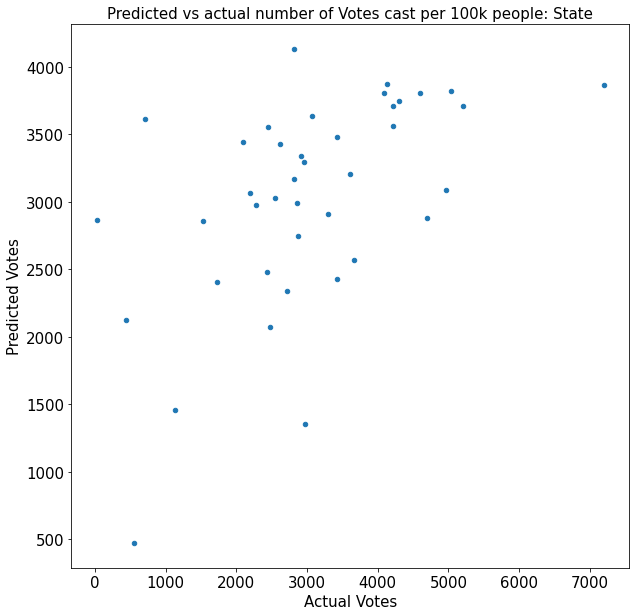

In [52]:
#plot actual vs predicted number of votes
state_results.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: State',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

Text(0.5, 1.0, 'Predicted vs actual number of Votes cast per 100k people: State')

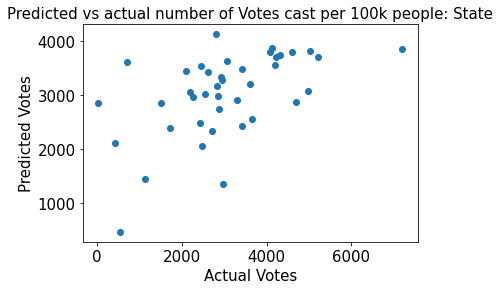

In [53]:
#other plot
plt.scatter(x = state_results['votes_100K'], y = state_results['vote_preds'])
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.title('Predicted vs actual number of Votes cast per 100k people: State')

Checking model effectiveness: MSE & R2

In [54]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(state_results['votes_100K'], state_results['vote_preds'])

1460084.2187467588

In [55]:
#R2
from sklearn.metrics import r2_score
r2s_state = r2_score
r2s_state(state_results['votes_100K'], state_results['vote_preds'])

0.2860650364766063

##By County

In [149]:
#new instance
lr1 = LinearRegression(fit_intercept= False)

In [150]:
#select relevant columns
X1 = full_df[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y1 = full_df['votes_100K']

In [151]:
#fit models, find intercept & coefficients
lr1.fit(X1,y1)
print(lr1.coef_)
print(lr1.intercept_)

[  26.04073099   16.21123573   34.73350137 -456.88098879   72.61516122
   16.63800925   33.88052573]
0.0


In [142]:
#predict num votes per county
full_df['vote_preds'] = lr.predict(X1)

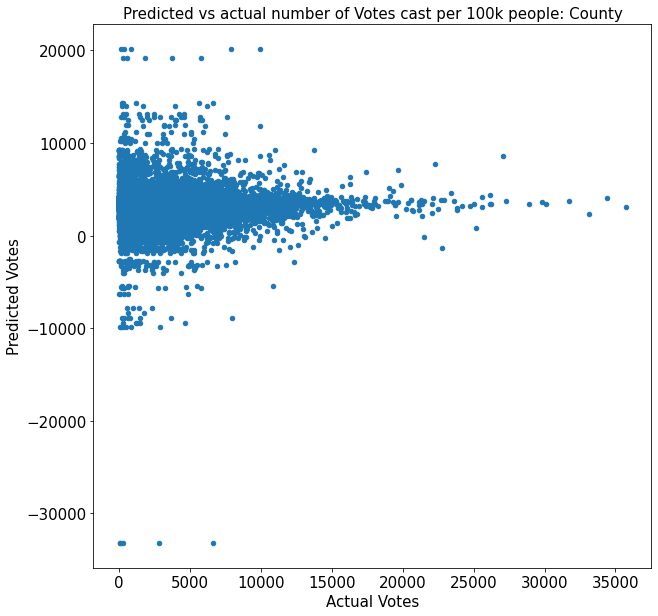

In [143]:
full_df.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: County',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

Text(0.5, 1.0, 'Predicted vs actual number of Votes cast per 100k people')

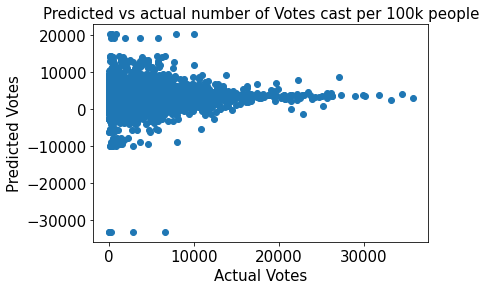

In [ ]:
plt.scatter(x = full_df['votes_100K'], y = full_df['vote_preds'])
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.title('Predicted vs actual number of Votes cast per 100k people')

Checking model effectiveness: MSE & R2

In [144]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(full_df['votes_100K'], full_df['vote_preds'])

12614795.39189933

In [145]:
#R2
from sklearn.metrics import r2_score
r2s_county = r2_score
r2s_county(full_df['votes_100K'], full_df['vote_preds'])

-0.24903105036492867

##Predicting number of votes cast using EVERYTHING

In [154]:
lr2 = LinearRegression(fit_intercept=False)

In [66]:
fullest_df.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes', 'area_name', 'Population_est (2014)',
       'Population_est (2010)', 'Population_PCT_Change (2010-2014)',
       'Population (2010)', 'AGE135214', 'Under_18_age_pct (2014)',
       'Over_65_age_pct (2014)', 'Female_pct (2014)', 'White_pct (2014)',
       'Black_pct (2014)', 'IndianAmer_pct (2014)', 'Asian_pct (2014)',
       'Hawaiian_pct (2014)', 'Biracial_pct (2014)', 'Hispanic_pct (2014)',
       'Caucasian_pct (2014)', 'Home_duration_over_1_year_ptc (2009-2013)',
       'Expatriate_pct (2009-2014)',
       'Bilingual_home_age_5_over_ptc (2009-2013)',
       'GED_degree_age_25_over_pct (2009-2013)', 'EDU685213',
       'Veterans (2009-2013)', 'Work_commute_min_age_16_over (2009-2013)',
       'Num_houses (2014)', 'Homeownership_pct (2009-2013)',
       'Muti_unit_houses_pct (2009-2013)',
       'Median_home_value_owner_occupied (2009-2013)',
       'Num_households (2009-2

In [155]:
#selecing all continuous variables & predicting votes
X2 = fullest_df.drop(columns = ['votes_100K','state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes', 'area_name'])
y2 = fullest_df['votes_100K']

In [156]:
lr2.fit(X2,y2)
print(lr2.coef_)
print(lr2.intercept_)

[-3.33074496e-03  2.76865368e-02  7.10164640e+00 -2.89184809e-02
 -1.18744480e+02 -8.54247113e+01  2.62403041e+01  3.95454286e+01
 -4.08812589e+01 -7.14097576e+01 -6.12555512e+01 -1.57044400e+02
 -2.98175130e+02 -9.25084463e+01 -1.71577613e+01 -3.03389730e+01
  4.12529031e+01 -4.04227637e+01  2.74692456e+01  3.35978199e+01
  3.21518965e+01 -4.88640790e-03  2.02235632e+01  4.91570298e-03
 -2.12232192e+01 -2.51461305e+01  1.72315509e-03  1.12105809e-02
  9.24439617e+02 -1.24086189e-02 -6.81866189e-03  3.98333193e+00
 -7.01989044e-02  1.95093559e-03  7.41570420e-01 -1.77798015e-02
  2.29102101e-02  7.76859105e+00 -2.44434604e+01  5.69775007e+01
  3.70996391e+02 -2.01864155e+01  3.31720639e-02  1.33332312e-05
  3.32050183e-06 -3.86302249e-05 -9.21728341e-05 -3.45575890e-05
 -9.48931064e-02 -1.39755956e-02  6.10744681e-03  4.34982203e-01
  4.34982194e-01]
0.0


In [73]:
fullest_df['vote_preds'] = lr2.predict(X2)

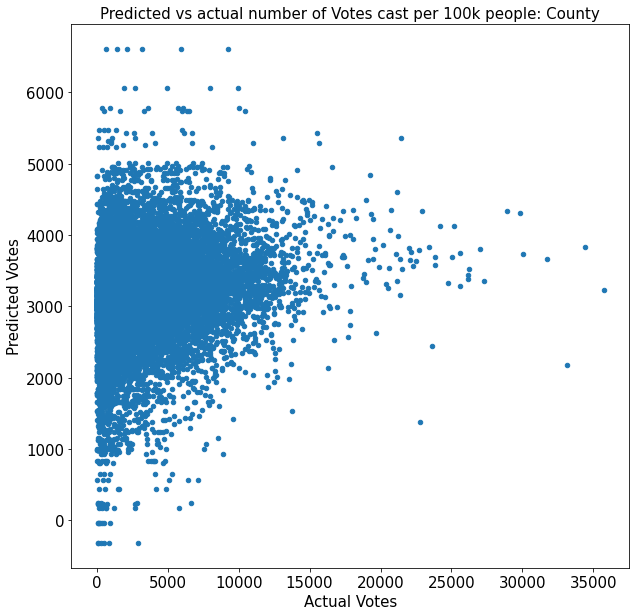

In [74]:
fullest_df.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: County',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

Text(0.5, 1.0, 'Predicted vs actual number of Votes cast per 100k people')

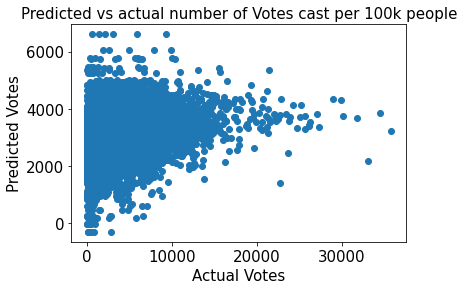

In [75]:
plt.scatter(x = fullest_df['votes_100K'], y = fullest_df['vote_preds'])
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.title('Predicted vs actual number of Votes cast per 100k people')

In [76]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(fullest_df['votes_100K'], fullest_df['vote_preds'])

9687731.683010302

In [77]:
#R2
from sklearn.metrics import r2_score
r2s_county = r2_score
r2s_county(fullest_df['votes_100K'], fullest_df['vote_preds'])

0.040786845623019485

##Combining Economic and Demographic conditions

In [157]:
lr3 = LinearRegression(fit_intercept=False)

In [79]:
fullest_df.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes', 'area_name', 'Population_est (2014)',
       'Population_est (2010)', 'Population_PCT_Change (2010-2014)',
       'Population (2010)', 'AGE135214', 'Under_18_age_pct (2014)',
       'Over_65_age_pct (2014)', 'Female_pct (2014)', 'White_pct (2014)',
       'Black_pct (2014)', 'IndianAmer_pct (2014)', 'Asian_pct (2014)',
       'Hawaiian_pct (2014)', 'Biracial_pct (2014)', 'Hispanic_pct (2014)',
       'Caucasian_pct (2014)', 'Home_duration_over_1_year_ptc (2009-2013)',
       'Expatriate_pct (2009-2014)',
       'Bilingual_home_age_5_over_ptc (2009-2013)',
       'GED_degree_age_25_over_pct (2009-2013)', 'EDU685213',
       'Veterans (2009-2013)', 'Work_commute_min_age_16_over (2009-2013)',
       'Num_houses (2014)', 'Homeownership_pct (2009-2013)',
       'Muti_unit_houses_pct (2009-2013)',
       'Median_home_value_owner_occupied (2009-2013)',
       'Num_households (2009-2

In [158]:
X3 = fullest_df[['Black_pct (2014)',
                                'IndianAmer_pct (2014)',
                                'Asian_pct (2014)',
                                'Hawaiian_pct (2014)',
                                'Biracial_pct (2014)',
                                'Hispanic_pct (2014)',
                                'Caucasian_pct (2014)',
                 'Manufacturers_shipments_by_$1000 (2007)',
       'Merchant_wholesaler_sales_by_$1000 (2007)',
       'Retail_sales_by_$1000 (2007)',
       'Accom_and_food_service_sales_by_$1000 (2007)']]
y3 = fullest_df['votes_100K']

In [159]:
lr3.fit(X3,y3)
print(lr3.coef_)
print(lr3.intercept_)

[ 2.56807765e+01  1.71357168e+01  2.63781974e+01 -4.24233993e+02
  6.57526785e+01  1.62747489e+01  3.37845900e+01  2.09860336e-05
 -2.32701389e-05  3.72818236e-05 -7.67068373e-05]
0.0


In [85]:
fullest_df['vote_preds_2'] = lr3.predict(X3)

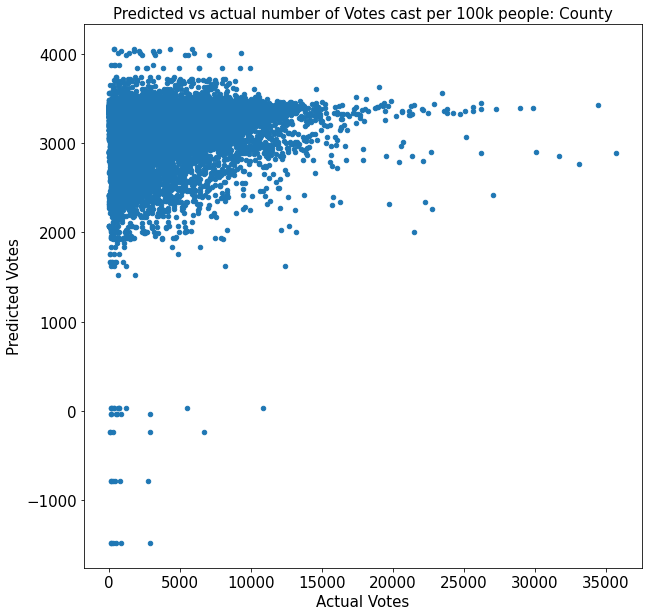

In [86]:
fullest_df.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds_2',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: County',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

In [87]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(fullest_df['votes_100K'], fullest_df['vote_preds_2'])

9990148.049626816

In [88]:
#R2
from sklearn.metrics import r2_score
r2s_county = r2_score
r2s_county(fullest_df['votes_100K'], fullest_df['vote_preds_2'])

0.010843638435915182

#Logistic Regression Models 
Since we're predicting categroical outcomes (if X candidate won or not), we will be using logistic regression.

In [90]:
from sklearn.linear_model import LogisticRegression

##Clinton vs Sanders

###Demographic Preds: Race/Ethnicity
predict candidate using demographic factors

In [91]:
#create logr instance and select input / output columns
dem_logr = LogisticRegression()
X_dem = dem_winner[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = dem_winner['clinton_win']

In [92]:
X_dem.head()

,Black_pct (2014),IndianAmer_pct (2014),Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014)
0,18.7,0.5,1.1,0.1,1.8,2.7,75.6
1,18.7,0.5,1.1,0.1,1.8,2.7,75.6
2,47.6,0.6,0.5,0.2,0.9,4.5,46.6
3,47.6,0.6,0.5,0.2,0.9,4.5,46.6
4,1.8,0.6,0.3,0.1,1.2,8.7,87.8


In [93]:
y_dem.head()

0    1
1    1
2    1
3    1
4    1
Name: clinton_win, dtype: int64

In [94]:
dem_logr.fit(X_dem,y_dem)

LogisticRegression()

In [96]:
#make predictions for clinton win T/F
dem_winner['logr_preds'] = dem_logr.predict(X_dem)
dem_winner.head()

,state,state_abbreviation,county_x,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K,county_y,clinton_win,logr_preds
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,75.6,91.8,53682,12.1,598175,12003,982.038090,Autauga,1,1
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,75.6,91.8,53682,12.1,598175,12003,4309.053164,Autauga,1,1
2,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,Barbour County,26887,...,46.6,31.0,32911,26.7,188337,6334,825.677837,Barbour,1,1
3,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Barbour County,26887,...,46.6,31.0,32911,26.7,188337,6334,9547.364898,Barbour,1,1
4,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386,Blount County,57719,...,87.8,88.9,44145,15.8,319700,5622,684.350041,Blount,1,0


check accuracy

In [121]:
sumT = sum(dem_winner['clinton_win']== dem_winner['logr_preds']) 
sumT/len(dem_winner) #79.4% correct predictions

0.7944038929440389

confusion matrix

In [120]:
from sklearn.metrics import confusion_matrix #checks accuracy of categorical predictions

confusion_matrix(dem_winner['clinton_win'], dem_winner['logr_preds'], normalize='true') #normalize true makes as %  of t vs f predictions
#normalize = 'all' makes % of all predictions

array([[0.8022508 , 0.1977492 ],
       [0.21037182, 0.78962818]])

AUROC

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(dem_winner['clinton_win'], dem_winner['logr_preds'])

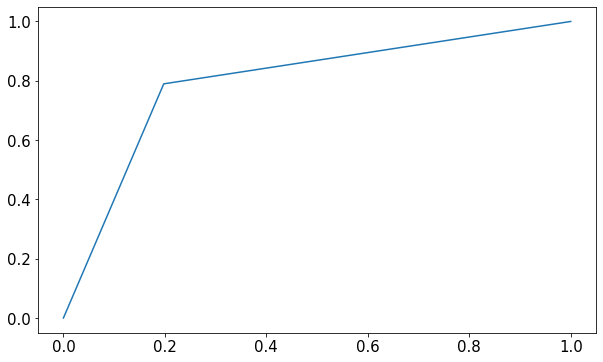

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr) #plots false positive and true positive rate
#want true positive - prediction is correct 

In [103]:
roc_auc = roc_auc_score(dem_winner['clinton_win'], dem_winner['logr_preds'])
roc_auc

0.7959394919488298

###Demographic Preds: Gender
Are areas with a higher proportion of females more likely to vote for Hillary Clinton? Can we predict Clinton win based on % female?

In [112]:
#new instance of logr, setting variables 

dem_logr1 = LogisticRegression()
X1_dem = dem_winner[['Female_pct (2014)']]
y1_dem = dem_winner['clinton_win']

In [111]:
X1_dem.head()

,Female_pct (2014)
0,51.4
1,51.4
2,46.6
3,46.6
4,50.5


In [106]:
y1_dem.head()

0    1
1    1
2    1
3    1
4    1
Name: clinton_win, dtype: int64

In [114]:
#fit the model
dem_logr.fit(X1_dem,y1_dem)

LogisticRegression()

In [113]:
#new col with predictions
dem_winner['logr_preds_gender'] = dem_logr.predict(X1_dem)
dem_winner.head()

,state,state_abbreviation,county_x,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K,county_y,clinton_win,logr_preds,logr_preds_gender
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,Autauga County,55395,...,91.8,53682,12.1,598175,12003,982.038090,Autauga,1,1,1
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Autauga County,55395,...,91.8,53682,12.1,598175,12003,4309.053164,Autauga,1,1,1
2,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,Barbour County,26887,...,31.0,32911,26.7,188337,6334,825.677837,Barbour,1,1,1
3,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Barbour County,26887,...,31.0,32911,26.7,188337,6334,9547.364898,Barbour,1,1,1
4,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386,Blount County,57719,...,88.9,44145,15.8,319700,5622,684.350041,Blount,1,0,1


check accuracy

In [117]:
sumT = sum(dem_winner['clinton_win']== dem_winner['logr_preds_gender']) 
sumT/len(dem_winner) #60% correct predictions

0.6058394160583942

confusion matrix

In [122]:
from sklearn.metrics import confusion_matrix #checks accuracy of categorical predictions

confusion_matrix(dem_winner['clinton_win'], dem_winner['logr_preds_gender'], normalize='true') 
#normalize true makes as %  of t vs f predictions
#normalize = 'all' makes % of all predictions

array([[0.01768489, 0.98231511],
       [0.03620352, 0.96379648]])

AUROC

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(dem_winner['clinton_win'], dem_winner['logr_preds_gender'])

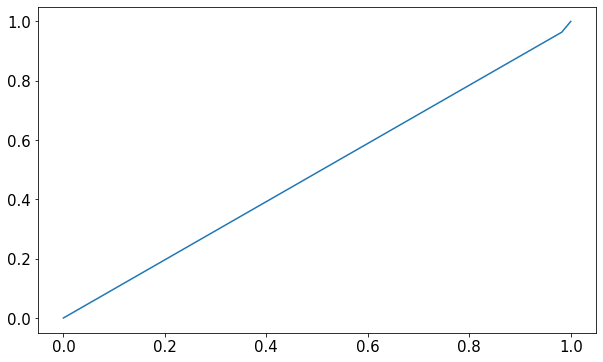

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr) #plots false positive and true positive rate
#want true positive - prediction is correct 
#want 100% TP across x (straight line @ 1)

In [125]:
roc_auc = roc_auc_score(dem_winner['clinton_win'], dem_winner['logr_preds_gender'])
roc_auc

0.4907406824774574

##Trump vs Cruz

###Demographic Preds: Race/Ethnicity
predict candidate using demographic factors


In [126]:
rep_logr = LogisticRegression()
X_rep = rep_winner[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)',]]
y_rep = rep_winner['trump_win']

In [127]:
X_rep.head()

,Black_pct (2014),IndianAmer_pct (2014),Asian_pct (2014),Hawaiian_pct (2014),Biracial_pct (2014),Hispanic_pct (2014),Caucasian_pct (2014)
0,18.7,0.5,1.1,0.1,1.8,2.7,75.6
1,18.7,0.5,1.1,0.1,1.8,2.7,75.6
2,9.6,0.7,0.9,0.1,1.6,4.6,83.0
3,9.6,0.7,0.9,0.1,1.6,4.6,83.0
4,22.1,0.4,0.2,0.1,0.9,2.1,74.5


In [128]:
y_rep.head()

0    1
1    1
2    1
3    1
4    1
Name: trump_win, dtype: int64

In [129]:
rep_logr.fit(X_rep,y_rep)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
rep_winner['logr_preds'] = rep_logr.predict(X_rep)
rep_winner.head()

,state,state_abbreviation,county_x,fips,party,candidate,votes,fraction_votes,area_name,Population_est (2014),...,Caucasian_pct (2014),Population_per_sqr_mile (2010),Median_household_income (2009-2013),Pct_below_pverty_level (2009-2013),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),votes_100K,county_y,trump_win,logr_preds
0,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,Autauga County,55395,...,75.6,91.8,53682,12.1,598175,12003,9724.704396,Autauga,1,1
1,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,Autauga County,55395,...,75.6,91.8,53682,12.1,598175,12003,4480.548786,Autauga,1,1
2,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,Baldwin County,200111,...,83.0,114.6,50221,13.9,2966489,17166,11802.449640,Baldwin,1,1
3,Alabama,AL,Baldwin,1003.0,Republican,Ted Cruz,8571,0.170,Baldwin County,200111,...,83.0,114.6,50221,13.9,2966489,17166,4283.122867,Baldwin,1,1
4,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494,Bibb County,22506,...,74.5,36.8,36447,18.1,124707,5804,8704.345508,Bibb,1,1


check accuracy

In [131]:
sumT = sum(rep_winner['trump_win']== rep_winner['logr_preds']) #number rows correct
sumT/len(rep_winner) #62% correct predictions

0.797011207970112

confusion matrix

In [132]:
from sklearn.metrics import confusion_matrix #checks accuracy of categorical predictions

confusion_matrix(rep_winner['trump_win'], rep_winner['logr_preds'], normalize='true') #normalize true makes as %  of t vs f predictions
#normalize = 'all' makes % of all predictions

array([[0.20923913, 0.79076087],
       [0.02827141, 0.97172859]])

AUROC

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(dem_winner['clinton_win'], dem_winner['logr_preds_gender'])

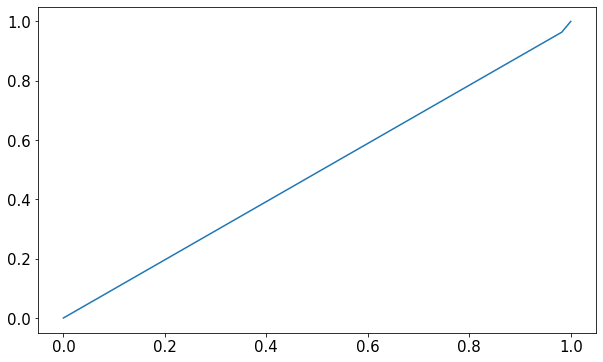

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr) #plots false positive and true positive rate
#want true positive - prediction is correct 
#want 100% TP across x (straight line @ 1)

In [135]:
roc_auc = roc_auc_score(dem_winner['clinton_win'], dem_winner['logr_preds_gender'])
roc_auc

0.4907406824774574